In [89]:
from planet4 import io

In [110]:
p = Path('/Users/klay6683/Dropbox/data/planet4/duplicates_testing/')

In [111]:
p = p / 'applied_cut_0.5'
p

PosixPath('/Users/klay6683/Dropbox/data/planet4/duplicates_testing/applied_cut_0.5')

In [112]:
def hunt_bug(fname):
    df = pd.read_csv(fname)
    return (df[df.duplicated()].shape[0])

In [113]:
fnames = p.glob('*.csv')
obsids = []
no_of_dupes = []
kind = []
i = 0
for fname in fnames:
    i+=1
    tokens = fname.name.split('_')
    obsids.append('_'.join(tokens[:3]))
    kind.append(tokens[3].split('.')[0])
    no_of_dupes.append(hunt_bug(fname))
print(i, 'no of files.')

2 no of files.


In [114]:
df = pd.DataFrame(dict(obsids=obsids, no_of_dupes=no_of_dupes,
                       kind=kind))
df.sort_values(by='no_of_dupes', ascending=False)

kind  no_of_dupes           obsids
0  blotches            7  ESP_021520_0925
1      fans            0  ESP_021520_0925

In [7]:
df[df.no_of_dupes>0].shape

(172, 3)

In [8]:
from hirise import hirise_tools as ht

In [9]:
df['orbit'] = df.obsids.map(lambda x: int(ht.OBSERVATION_ID(x).orbit))

In [10]:
%matplotlib inline

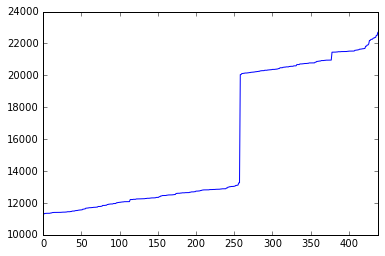

In [11]:
df.orbit.plot()

In [12]:
df[df.orbit < 18000].head(15)

kind  no_of_dupes           obsids  orbit
0   blotches           46  ESP_011296_0975  11296
1       fans            0  ESP_011296_0975  11296
2   blotches            0  ESP_011341_0980  11341
3       fans            0  ESP_011341_0980  11341
4   blotches            3  ESP_011348_0950  11348
5       fans            0  ESP_011348_0950  11348
6   blotches           13  ESP_011350_0945  11350
7       fans            0  ESP_011350_0945  11350
8   blotches           25  ESP_011351_0945  11351
9       fans            3  ESP_011351_0945  11351
10  blotches            0  ESP_011370_0980  11370
11      fans            0  ESP_011370_0980  11370
12  blotches           12  ESP_011394_0935  11394
13      fans            0  ESP_011394_0935  11394
14  blotches            9  ESP_011403_0945  11403

# reproduce

In [94]:
obsid = 'ESP_021520_0925'

In [95]:
fnames = list(p.glob(obsid+'*.csv'))
fnames

[PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/season23_2016-05-31/applied_cut_0.5/ESP_021520_0925_blotches.csv'),
 PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/season23_2016-05-31/applied_cut_0.5/ESP_021520_0925_fans.csv')]

In [96]:
blotches = pd.read_csv(fnames[0])
fans = pd.read_csv(fnames[1])
# fnotches = pd.read_csv(fnames[2])

In [97]:
for item in [blotches,fans]:
    print(item.duplicated().value_counts())

False    3180
True       82
dtype: int64
False    5736
True        1
dtype: int64


In [98]:
g = blotches[blotches.duplicated(keep='first')].groupby('image_id')
g.size().sort_values(ascending=False).head(10)

image_id
APF0000w0x    5
APF0000vzi    5
APF0000vxa    3
APF0000w2z    3
APF0000w43    3
APF0000vz5    3
APF0000w5d    2
APF0000vzh    2
APF0000w1a    2
APF0000w29    2
dtype: int64

In [99]:
from planet4 import plotting,markings

In [100]:
image_id = 'APF0000w0x'
blotches_id = blotches[blotches.image_id==image_id]
fans_id = fans[fans.image_id==image_id]

In [101]:
blotches_id.head()

x           y      image_x       image_y      angle   radius_1  \
616  450.700000  311.400000  1190.700000  20039.400000  16.652608  10.842534   
617  458.333333  282.000000  1198.333333  20010.000000  16.223548  10.000000   
618  283.142857  433.714286  1551.714286  20318.285714  14.584577  13.007399   
619  631.666667  485.000000  1371.666667  20213.000000  29.456085  10.935416   
620  615.500000  514.333333  1355.500000  20242.333333  37.213632  12.339640   

      radius_2         p1_x          p1_y         p2_x          p2_y  \
616  10.131901  1201.087797  20030.614414  1180.312203  20048.185586   
617  10.000000  1207.935123  20005.069566  1188.731544  20014.930434   
618  11.378126  1564.302548  20330.012804  1539.126024  20306.558625   
619  10.000000  1381.188493  20202.881771  1362.144840  20223.118229   
620  10.219834  1365.327117  20236.575251  1345.672883  20248.091415   

            p3_x          p3_y         p4_x          p4_y    image_id  \
616  1187.796520  20049.106967  1193.603480  20029.693033  APF0000w0x   
617  1195.539476  20019.601789  1201.127191  20000.398211  APF0000w0x   
618  1548.849173  20329.297203  1554.579399  20307.274226  APF0000w0x   
619  1366.749103  20221.707329  1376.584230  20204.292671  APF0000w0x   
620  1349.319161  20250.472267  1361.680839  20234.194400  APF0000w0x   

     n_members  
616          5  
617          3  
618          7  
619          3  
620          3

In [102]:
dbname = '/Users/klay6683/Dropbox/data/planet4/2016-05-29_planet_four_classifications_queryable_cleaned_seasons2and3.h5'
p4id = markings.ImageID(image_id, dbname=dbname, scope='planet4')

In [103]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


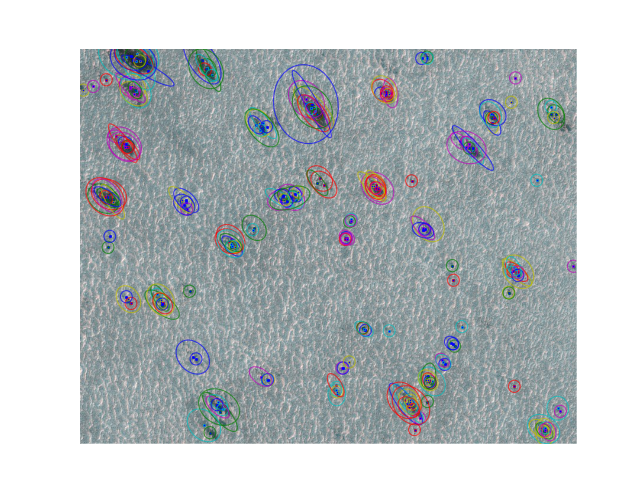

In [38]:
p4id.plot_blotches()

<IPython.core.display.Javascript object>


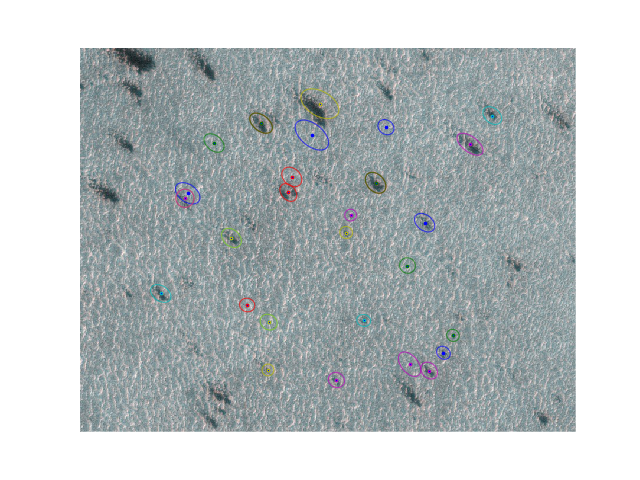

In [27]:
fig, ax = plt.subplots()
p4id.plot_blotches(blotches=blotches_id, ax=ax)

<IPython.core.display.Javascript object>


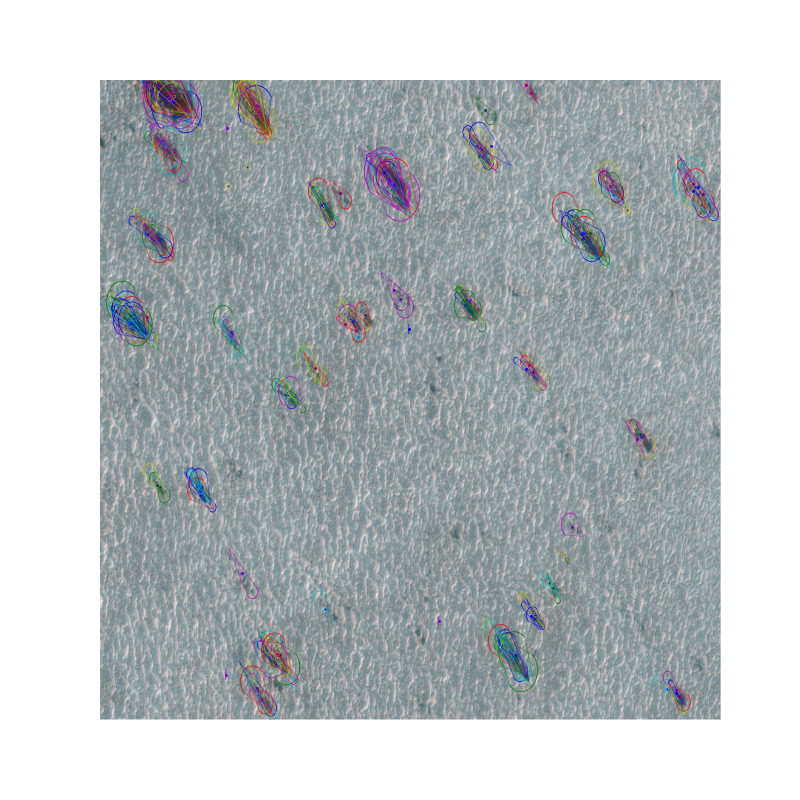

In [104]:
fig, ax = plt.subplots()
p4id.plot_fans(ax=ax)

<IPython.core.display.Javascript object>


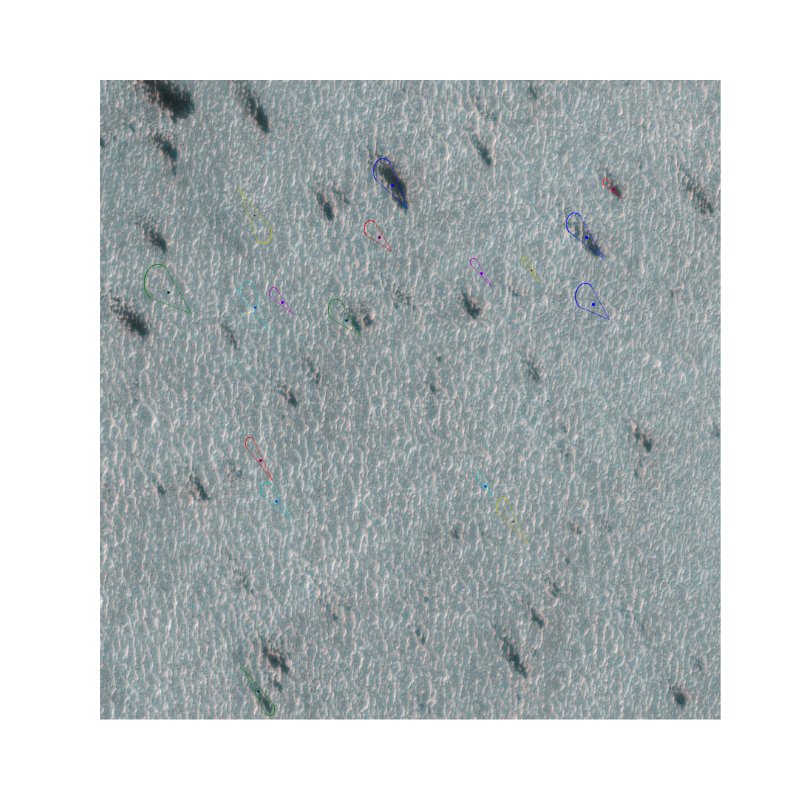

In [105]:
fig, ax = plt.subplots()
p4id.plot_fans(fans=fans_id, ax=ax)

In [40]:
from planet4 import clustering,io

In [128]:
fname = '/Users/klay6683/data/planet4/2016-05-29_planet_four_classifications_queryable_cleaned.h5'

In [129]:
cm = clustering.ClusteringManager(output_dir='duplicates_testing',
                                  dbname=fname)

In [130]:
cm.db.dbname

'/Users/klay6683/data/planet4/2016-05-29_planet_four_classifications_queryable_cleaned.h5'

In [48]:
db = io.DBManager(dbname=fname)

In [54]:
obsiddata = db.get_image_name_markings(obsid)

In [57]:
image_id

'APF0000w0x'

In [64]:
twoids = obsiddata.image_id.unique()[:2]

In [71]:
imageids = list(twoids) + [image_id]

In [72]:
imageids

['APF0000w5d', 'APF0000vyb', 'APF0000w0x']

In [73]:
data = obsiddata[obsiddata.image_id.isin(imageids)]

In [82]:
x_tiles = [1,3]
y_tiles = [36, 38]
data = []
for x_tile in x_tiles:
    for y_tile in y_tiles:
        f1 = obsiddata.x_tile == x_tile
        f2 = obsiddata.y_tile == y_tile
        data.append(obsiddata[f1 & f2])
data.append(obsiddata[obsiddata.image_id==image_id])
data = pd.concat(data)

In [83]:
data.image_id.unique()

array(['APF0000vx7', 'APF0000w1c', 'APF0000vyy', 'APF0000w3j', 'APF0000w0x'], dtype=object)

In [84]:
cm.cluster_image_name(obsid, data=data)

n_classifications: 448
min_samples: 3


<IPython.core.display.Javascript object>


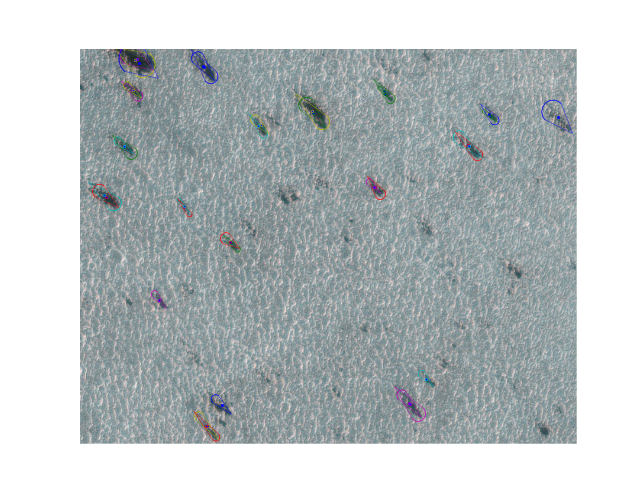

In [115]:
plotting.plot_clustered_fans(datapath='duplicates_testing',image_id=image_id, scope_id=obsid)

In [131]:
cm = clustering.ClusteringManager(scope='hirise', output_dir='testing_by_obsid',
                                  dbname=fname)

In [133]:
cm.db.dbname

'/Users/klay6683/data/planet4/2016-05-29_planet_four_classifications_queryable_cleaned.h5'

In [87]:
cm.cluster_image_name(obsid)

n_classifications: 26709
min_samples: 3


<IPython.core.display.Javascript object>


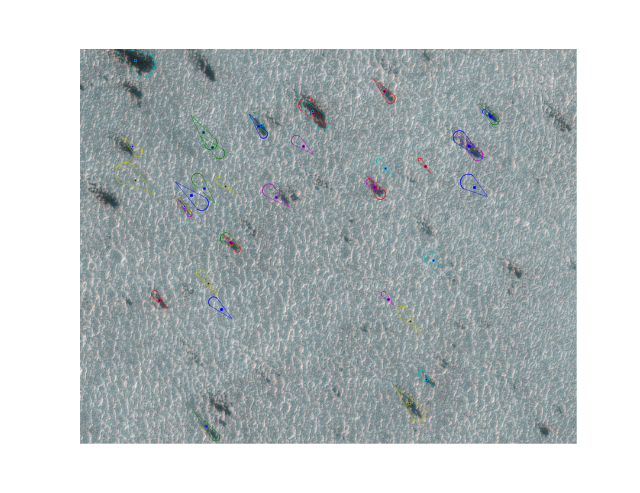

In [107]:
plotting.plot_clustered_fans(datapath='testing_by_obsid', image_id=image_id,
                             scope_id=obsid)

In [146]:
from hirise import hirise_tools as ht
from pathlib import Path

pid = ht.PRODUCT_ID("PSP_003092_0985_RED")
ht.download_product(Path(pid.jp2_path), saveroot="your_jp2_folder")

AttributeError: 'str' object has no attribute 'name'

In [147]:
pid.jp2_path

'RDR/PSP/ORB_003000_003099/PSP_003092_0985/PSP_003092_0985_RED.JP2'